# Support Vector Classifier

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

/Users/johngalvin/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../data/clinical_training_data.csv')

# For converting categorical variables to ints
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# Split features / target
X = df.drop(columns=['AD_dx_in_5_yrs'])
y = df['AD_dx_in_5_yrs']

# Encode features
X["DX.bl"] = label_encoder.fit_transform(X["DX.bl"])
X["PTGENDER"] = label_encoder.fit_transform(X["PTGENDER"])
X["PTETHCAT"] = label_encoder.fit_transform(X["PTETHCAT"])
X["PTRACCAT"] = label_encoder.fit_transform(X["PTRACCAT"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate Model
svc = SVC()

### Grid Search

In [14]:
# Grid search
param_grid = {
    "C": [0.1, 1, 10],                
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto", 0.1],
    "degree": [1, 2, 3, 4, 5]}

In [15]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring="accuracy")

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [17]:
# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.777753164556962


### Train with Best Parameters

In [18]:
# Instantiate and fit model
svc = SVC(C=0.1, degree=4, gamma="scale", kernel="poly")

svc.fit(X_train, y_train)

SVC(C=0.1, degree=4, kernel='poly')

In [20]:
# Assess
y_pred = svc.predict(X_test)

# evaluate predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84        79
           1       0.44      0.70      0.54        20

    accuracy                           0.76        99
   macro avg       0.67      0.74      0.69        99
weighted avg       0.81      0.76      0.78        99



# Neural Network

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

tf.config.run_functions_eagerly(True)

In [50]:
df = pd.read_csv('../data/clinical_training_data.csv')

# For converting categorical variables to ints
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# Split features / target
X = df.drop(columns=['AD_dx_in_5_yrs'])
y = df['AD_dx_in_5_yrs']

# Encode features
X["DX.bl"] = label_encoder.fit_transform(X["DX.bl"])
X["PTGENDER"] = label_encoder.fit_transform(X["PTGENDER"])
X["PTETHCAT"] = label_encoder.fit_transform(X["PTETHCAT"])
X["PTRACCAT"] = label_encoder.fit_transform(X["PTRACCAT"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
IN_FEATURES = X_train[0].shape[0]

In [52]:
def create_model(dropout=0.3, learning_rate=0.001):
    
    """Builds classification model"""
    
    model = tf.keras.Sequential()
    inputs = tf.keras.layers.Input(shape=(IN_FEATURES,), name="input_layer") # (Batch, num_features)
    
    hidden_1 = tf.keras.layers.Dense(512, activation="relu", name="hidden_1")(inputs)
    hidden_1 = tf.keras.layers.Dropout(dropout)(hidden_1)
    hidden_2 = tf.keras.layers.Dense(256, activation="relu", name="hidden_2")(hidden_1)
    hidden_2 = tf.keras.layers.Dropout(dropout)(hidden_2)
    
    classification = tf.keras.layers.Dense(2, activation="sigmoid", name="classification_layer")(hidden_2)
    classification_model = tf.keras.Model(inputs=[inputs], outputs=[classification])
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                                 metrics="accuracy")
    
    return classification_model

In [53]:
model = create_model()

In [54]:
history = model.fit(X_train,
                    y_train,
                    batch_size=16,
                    epochs=20)

Epoch 1/20
 4/25 [===>..........................] - ETA: 0s - loss: 0.6348 - accuracy: 0.6406

/Users/johngalvin/miniforge3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


25/25 [==============================] - 1s 21ms/step - loss: 0.5375 - accuracy: 0.6894
Epoch 2/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4519 - accuracy: 0.7449
Epoch 3/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4447 - accuracy: 0.7626
Epoch 4/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4412 - accuracy: 0.7551
Epoch 5/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4331 - accuracy: 0.7626
Epoch 6/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4263 - accuracy: 0.7929
Epoch 7/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4287 - accuracy: 0.7652
Epoch 8/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4274 - accuracy: 0.7677
Epoch 9/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4345 - accuracy: 0.7803
Epoch 10/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4392 - accuracy: 0.7500
Epoch 11/20
25/25 [=

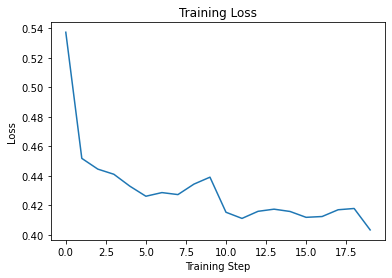

In [55]:
# Visualize loss curve

losses = history.history["loss"]
plt.plot(losses)
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [56]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 11ms/step - loss: 0.3787 - accuracy: 0.7576


[0.37867748737335205, 0.7575757503509521]

In [42]:
preds = model.predict(X_test)
preds

4/4 [==============================] - 0s 5ms/step


/Users/johngalvin/miniforge3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[0.86192125, 0.15003736],
       [0.55762756, 0.44584888],
       [0.4720139 , 0.529757  ],
       [0.9357584 , 0.08239498],
       [0.46548936, 0.52982986],
       [0.44152763, 0.55836856],
       [0.63836706, 0.36539918],
       [0.70040995, 0.30931243],
       [0.91335815, 0.10286877],
       [0.9273186 , 0.09227961],
       [0.57733923, 0.42451853],
       [0.56934434, 0.43440825],
       [0.64469355, 0.35937735],
       [0.9188275 , 0.09635723],
       [0.47714466, 0.5194847 ],
       [0.888991  , 0.12623824],
       [0.46332446, 0.5434237 ],
       [0.9632687 , 0.0494017 ],
       [0.6243093 , 0.38195646],
       [0.55105054, 0.4454887 ],
       [0.59554046, 0.4134955 ],
       [0.9559521 , 0.05849318],
       [0.47609746, 0.52668905],
       [0.8565648 , 0.15879028],
       [0.9633104 , 0.04940414],
       [0.95618695, 0.05773681],
       [0.7506483 , 0.26761663],
       [0.44693696, 0.5605627 ],
       [0.963319  , 0.04931172],
       [0.96326107, 0.04945073],
       [0.